# MNIST Fashion

MNIST Fashion dataset is a database of fashion images that was intended to replace the simple MNIST digits data with the objective to pose a more challenging classification task. It is used to training and testing various machine learning systems.


The MNIST Fashion dataset is composed by 70,000 28x28 grayscale images of fashion products from 10 categories with 7,000 images per category. The training set consists of 60,000 images and the test set consist of 10,000 images.



In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore', category=FutureWarning)


Now, I will import the fashion minist dataset from the Keras module

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Now I will load the training and testing sets in to separete variables

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Now I will see the dimensions of my training testing sets.

In [4]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


So we have 60,000 images in the training set and 10,000 on the testing set and the dimension of each images is 28 x 28.

## The labels of the dataset

First I will take a look in the possible categories for my dataset and I will also recuperate their  indexes in order to access the correspondant images in X_train. I will save the indexes where each category appears in a variable called position_label.

In [5]:
label, position_label = np.unique(y_train, return_index = True)
print("The possible labels are {} \nTheir indexes are {}".format(label,position_label))

The possible labels are [0 1 2 3 4 5 6 7 8 9] 
Their indexes are [ 1 16  5  3 19  8 18  6 23  0]


### Plotting the Categories of the Dataset

Now, I will plot a sample with the  imagse corresponding to each category of the training set.

To accomplish this, I will utilize Matplotlib. Given that there are 10 types of labels, I will construct a grid of 2 rows and 5 columns to display all the images, with one image representing each label.


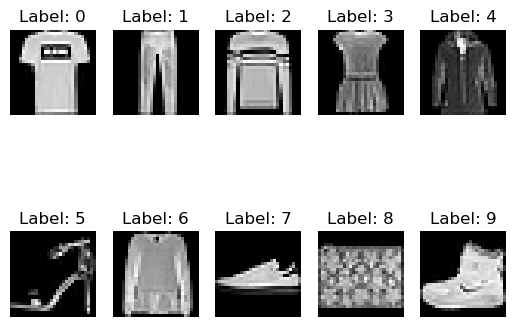

In [6]:
for i in range(len(position_label)):
    plt.subplot(2,5,1+i)
    plt.imshow(X_train[position_label[i]],cmap='gray')
    plt.title('Label: {}'.format(label[i]))
    plt.axis('off')
plt.show()


## Preprocessing

I will now reshape the arrays to form a two-dimensional array where each row corresponds to an image. This reshaping is a necessary step for applying the K-Nearest Neighbors (KNN) algorithm to the data.

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


### StandardScaler
Now I will work with the data normalized, so all the data will have a 0-mean and a unit standard deviation.

Scaling is applied to each column individualy, i.e., for each feature, we subtract its mean and divide by standard deviation

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)


X_test_scaled = scaler.transform(X_test)

Then, I will take a sample of the datasets to diminuir o tempo de processamento, ao inves de analisar o set todo.


In [9]:
indices_train = np.random.choice(X_train_scaled.shape[0], 18000, replace=False)

X_train_scaled_sample = X_train_scaled[indices_train]
y_train_sample = y_train[indices_train]

indices_test =  np.random.choice(X_test_scaled.shape[0], 3000, replace=False)
X_test_scaled_sample = X_test_scaled[indices_test]
y_test_sample = y_test[indices_test]

Now, I will examine the distribution of labels in my training and testing sets. 

In [10]:
labels_train, count_train = np.unique(y_train_sample, return_counts = True)

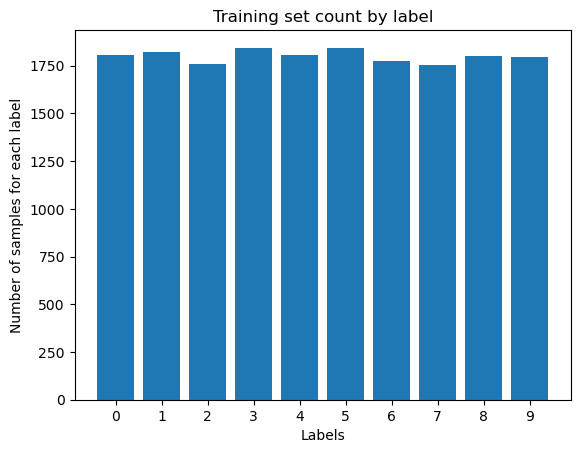

In [11]:
plt.bar(labels_train,count_train)
plt.xlabel('Labels')
plt.ylabel('Number of samples for each label')
plt.title('Training set count by label')
plt.xticks(labels_train) 
plt.show()

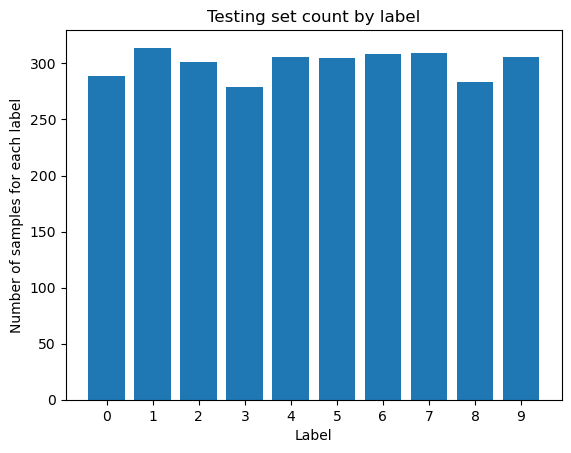

In [28]:
labels_test, count_test = np.unique(y_test_sample, return_counts = True)
plt.bar(labels_test,count_test)
plt.xlabel('Label')
plt.ylabel('Number of samples for each label')
plt.title('Testing set count by label')
plt.xticks(labels_test) 
plt.show()

# KNN algorithm

Firstly, I will establish which hyperparameter to utilize in the KNN algorithm. To illustrate the significance of determining a suitable value for the number of neighbors, I will begin by implementing the KNN algorithm with n_neighbors set to 1. 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import time

KNN = KNeighborsClassifier(n_neighbors = 1)

In [15]:
start = time.time()
KNN.fit(X_train_scaled_sample, y_train_sample)
elapsed_time = time.time() - start

Calculating the accuracy of my model in the training set and in the testing set

In [17]:
accuracy_training = KNN.score(X_train_scaled_sample,y_train_sample)


In [18]:
accuracy_test = KNN.score(X_test_scaled_sample,y_test_sample)

In [19]:
print("The accuracy of KNN on the training set is {:.4f} with a fitting time of {:.2f} s".format(accuracy_training, elapsed_time))
      
print("The accuracy on the test set is {:.4f}".format(accuracy_test))

The accuracy of KNN on the training set is 1.0000 with a fitting time of 0.94 s
The accuracy on the test set is 0.8140


As it is possible to see, the training set accuracy is 1, that indicates we have a overfitting, suggesting that the model memorizes the training data rather than learning the underlying patterns, leading to a low generalization to new, unseen data.

To establish a better criterion for choosing the number of neighbors, I will compute the scores for different numbers of neighbors ranging from 2 to 19. This range will help determine the point where the model balances between overfitting and underfitting, which should correspond to the optimal number of neighbors for the KNN algorithm.

In [20]:
neighbors = list(range(2,20))
train_score = {}
test_score = {}
for i in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train_scaled_sample ,y_train_sample)
    train_score[i]=KNN.score(X_train_scaled_sample , y_train_sample)*100
    test_score[i]=KNN.score(X_test_scaled_sample, y_test_sample)*100
    print("Neighbors {};  score training: {:.2f}%; score testing: {:.2f}%".format(i,train_score[i],test_score[i]))

Neighbors 2;  score training: 91.82%; score testing: 81.53%
Neighbors 3;  score training: 90.51%; score testing: 82.33%
Neighbors 4;  score training: 89.17%; score testing: 83.07%
Neighbors 5;  score training: 88.24%; score testing: 82.87%
Neighbors 6;  score training: 87.72%; score testing: 83.27%
Neighbors 7;  score training: 87.03%; score testing: 83.07%
Neighbors 8;  score training: 86.59%; score testing: 83.27%
Neighbors 9;  score training: 86.07%; score testing: 83.17%
Neighbors 10;  score training: 85.86%; score testing: 83.10%
Neighbors 11;  score training: 85.46%; score testing: 83.13%
Neighbors 12;  score training: 85.30%; score testing: 83.10%
Neighbors 13;  score training: 85.08%; score testing: 82.87%
Neighbors 14;  score training: 84.99%; score testing: 83.07%
Neighbors 15;  score training: 84.73%; score testing: 83.03%
Neighbors 16;  score training: 84.56%; score testing: 82.93%
Neighbors 17;  score training: 84.42%; score testing: 82.60%
Neighbors 18;  score training: 8

In [21]:
train_scores = [train_score[i] for i in neighbors]
test_scores = [test_score[i] for i in neighbors]

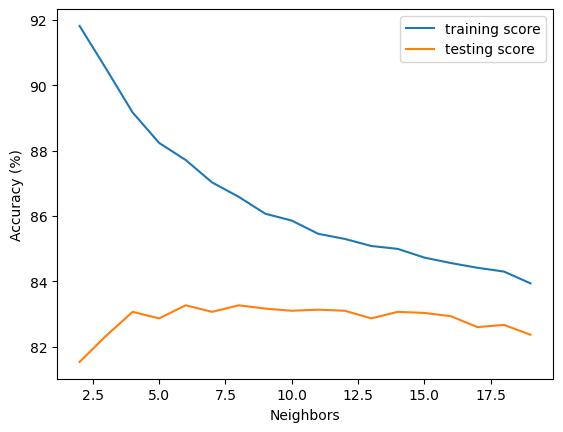

In [22]:
plt.plot(neighbors,train_scores, label = 'training score')
plt.plot(neighbors,test_scores, label = 'testing score')
plt.legend(loc='upper right')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy (%)')
plt.show()

As can be seen, when the number of neighbors is too low, the accuracy of the KNN algorithm on the testing set is quite low. As we increase the number of neighbors, the accuracy on the testing set increases, peaking at 6 neighbors. Beyond this peak, as the number of neighbors continues to grow, there is a gradual decline in testing accuracy, suggesting that the model starts to underfit.


Our goal is to find the optimal number of neighbors so that the accuracy of the testing set is as high as possible while ensuring that the gap between the training and testing scores is not substantial. A significant gap could indicate that the model is overfitted.


Upon examining the graph, it appears that with 6 neighbors, the accuracy is the highest on the chart, and there isn't a large discrepancy compared to the training accuracy. Therefore, 6 seems to be the ideal number of neighbors to choose.

### Hypertuning model parameters using GridSearchCV
To find the optimal hyperparameters that improve the accuracy of a KNN model, we can perform a grid search on the training set. By initializing GridSearchCV with cv=5, we specify that the grid search should use 5-fold cross-validation. This means that for each candidate value of n_neighbors, the training set will be split into 5 parts, with the model being trained on 4 parts and validated on the 5th part, rotating until each part has been used for validation. The param_grid is set to test n_neighbors ranging from 2 to 19. The grid search will evaluate all possible values within this range to find the optimal number of neighbors that yields the best cross-validated accuracy.urs 

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(2, 20)}
knn_gscv = GridSearchCV(KNN, param_grid)
knn_gscv.fit(X_train_scaled_sample ,y_train_sample)


{'n_neighbors': 6}

After executing this code, knn_gscv.best_params_ will provide us with the value of n_neighbors that resulted in the highest average accuracy score during the cross-validation process.

In [27]:
knn_gscv.best_params_


{'n_neighbors': 6}

We can see that 6 is the optimal value for ‘n_neighbors’.

## Final notes

For this task, I had to create a new environment with the following versions:
- numpy 1.19.5
- tensorflow 2.3
- pandas 1.1
- python 3.8
- matplotlib 3.6.2